## Assignment 1

###### Sub One

In [34]:
"""
I folded a paper again and again and take the current length of
the folded paper, keep comparing to the length of the mountain until
paper length exceeds the length of the mountain. Once this happens,
I return that folds that I have folded.

"""

def number_of_folds(m):
    mm=int(m*1000)
    assert mm>0,'Value should be greater than 0'
    for fold in range(mm):
        if(2**fold>mm):
            return fold
    return fold+1

print(number_of_folds(8484))

24


##### Sub Two
- I think done, but I will review it

In [3]:
"""
DEDUCE A FORMULA FROM A GIVEN DATA

v(t)=v(0)*exp(-a*t) #where a=0.1 and v(t)=v(0)/2
v(0)/2=v(0)*exp(-0.1*t) => v(0)/v(0)*2=exp(-0.1*t ) => 1/2=exp(-0.1*t)
From this formula, it was obvious to me that ln(1/2)=-0.1*t. So
t=ln(1/2)/(-0.1)

"""

import math

time=round(math.log(1/2)/(-0.1))

print(time)

7


###### Sub 3

In [33]:
"""The question is, if a bank give annual interest of 5% (compound interest) of money you deposited, and you deposit $100,
   How much money will you have after some N years.
   
   --------------APPROACH-------------------
   
   I am going to code a function called "calculateTotal(money, interest, years) WHERE
   money: money deposited
   interest: annual interest (e.g: if interest is 5%, interest argument will be 5)
   years: after how many years
   
   
   This function will return a rounded total money after entered years using enetered interest percent
   
   Here we go
   
"""
def calculateTotal(money, interest, years):
    total=money
    for i in range(years):
        total=(total+(total*interest/100)) # For each year, I take money that I have so far and add its interest on my account
    return round(total) #I am returning total money I will be having at the end of years passed in

print(f"After 1 Year:  ${calculateTotal(100,5,1)}")
print(f"After 2 Years: ${calculateTotal(100,5,2)}")
print(f"After 3 Years: ${calculateTotal(100,5,3)}")
print(f"After 4 Years: ${calculateTotal(100,5,4)}")
print(f"After 5 Years: ${calculateTotal(100,5,5)}")

After 1 Year:  $105
After 2 Years: $110
After 3 Years: $116
After 4 Years: $122
After 5 Years: $128


#### Sub 4

In [17]:
"""
   P=((r*PV)/(((1-(1+r)**-n))))
   where p: Payment money
         PV: Present Value (Money borrowed)
         r=rate per month
         n=number of months
"""

def getMonthlyPayment(loan,interest, years):
    months=years*12
    r=(interest/100)
    pv=loan
    n=months
    p=((r*pv)/(((1-(1+r)**-n))))
    return round(p)
    
print(f"In 1 Year:  ${getMonthlyPayment(20000,1,1)}")
print(f"In 2 Years: ${getMonthlyPayment(20000,1,2)}")
print(f"In 3 Years: ${getMonthlyPayment(20000,1,3)}")


In 1 Year:  $1777
In 2 Years: $941
In 3 Years: $664


#### Sub 5

Number of days:  70


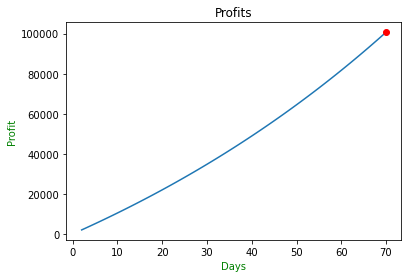

In [3]:
"""
For this problem, I assumed that all customers that you have will generate profit
everyday.
"""
import matplotlib.pyplot as plt

def getdayAndPlot(invest):
    customers=100
    cash=customers*10
    days=1
    cashList=[]
    d=[]
    while cash<invest:
        days+=1
        d.append(days)
        customers=customers+(customers*1/100)
        cash=cash+(customers*10)
        cashList.append(cash)
    plt.plot(d,cashList)
    plt.plot(d[-1],cashList[-1], 'ro')
    plt.xlabel('Days', color='green')
    plt.ylabel('Profit', color='green')
    plt.title("Profits")
    plt.legend
    plt.show
    return days

print("Number of days: ",getdayAndPlot(100000))


#x=days
#y=cash



# Question 6

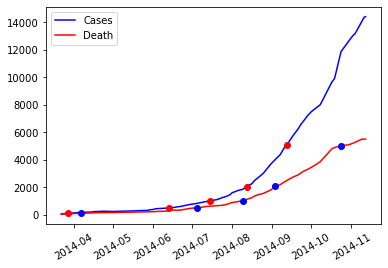

Dates for Cases: 
2014-03-27 00:00:00
2014-06-13 00:00:00
2014-07-15 00:00:00
2014-08-12 00:00:00
2014-09-12 00:00:00

Dates for Death: 
2014-04-06 00:00:00
2014-07-05 00:00:00
2014-08-09 00:00:00
2014-09-03 00:00:00
2014-10-24 00:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('./ebola_download.xls')

idx=pd.date_range(min(data.Date),max(data.Date))
newData=data.set_index('Date').reindex(idx)
newData=newData.interpolate(method='linear')

cases_datesList=[]
death_datesList=[]
casesList=[]
deathList=[]

values=[100,500,1000,2000,5000]
for data in values:
    cases_above= newData[newData['Cases']>data]
    death_above= newData[newData['Death']>data]
    cases_datesList.append(cases_above.index[0])
    death_datesList.append(death_above.index[0])
    casesList.append(cases_above['Cases'][0])
    deathList.append(death_above['Death'][0])

plt.plot(newData['Cases'], color='blue', label='Cases')
plt.plot(newData['Death'], color='red', label='Death')
# plt.plot(cases_datesList,casesList, color='blue', label='Cases')
# plt.plot(death_datesList,deathList, color='red', label='Death')
plt.plot(cases_datesList,casesList,'ro')
plt.plot(death_datesList,deathList,'bo')
plt.legend()
plt.xticks(rotation=30)
plt.show()

print("Dates for Cases: ")
for i in cases_datesList:
    print(i)
print()
print("Dates for Death: ")
for i in death_datesList:
    print(i)

# Question 7

In [26]:
# ((67-49)/49)*100
# ((max-min) /min)*100

# Loop in Cases col then apply the formula
def casesGrowthRate():
    list_of_cases=list(newData['Cases'])
    list_of_growth_rate=[]
    for i in range(len(list_of_cases)-1):
        list_of_growth_rate.append(((list_of_cases[i+1] - list_of_cases[i])/list_of_cases[i])*100)
    return sum(list_of_growth_rate)/len(list_of_growth_rate)

#  Do the same for deaths
def deathsGrowthRate():
    list_of_deaths=list(newData['Death'])
    list_of_growth_rate=[]
    for i in range(len(list_of_deaths)-1):
        list_of_growth_rate.append(((list_of_deaths[i+1] - list_of_deaths[i])/list_of_deaths[i])*100)
    return sum(list_of_growth_rate)/len(list_of_growth_rate) # return list of growth rates

print(f"Average rate for cases {casesGrowthRate()}")
print(f"Average rate for deaths: {deathsGrowthRate()}")

Average rate for cases 2.5065218916499963
Average rate for deaths: 2.330608083367968


# Question 8

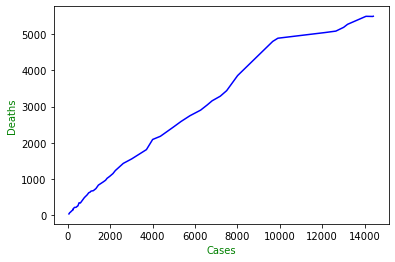

Average Ratio: 0.5577992908998354


In [37]:
import matplotlib.pyplot as plt
# Use same data, plot Death to Y axis, and Cases to X Axis.

# From above question Q6 & Q7, I have interpolated data stored in "newData" variable, let me use it
ratios=list()
for i in range(len(newData['Cases'])):
    ratios.append(list(newData['Death'])[i]/list(newData['Cases'])[i])
avg_ratio=sum(ratios)/len(ratios)

plt.plot(list(newData['Cases']),list(newData['Death']), color='blue')
plt.xlabel("Cases", color='green')
plt.ylabel("Deaths", color='green')
plt.show()

print(f"Average Ratio: {avg_ratio}")


# Question 9

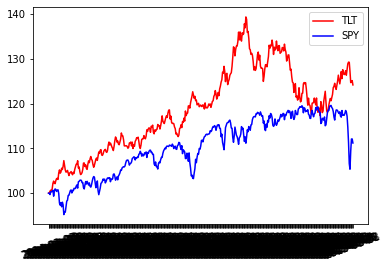

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

spy_data=pd.read_csv('./SPY.csv')
tlt_data=pd.read_csv('./TLT.csv')

# function to help me start from 100
def start100(f,i):
    return ((i/f)*100)
    
# ectract data from spy data
spy_data_for_date_given=spy_data[(spy_data['Date']>= '2014-01-01') & (spy_data['Date']<= '2015-08-31')]
spy_adjusted_closing_prices=[start100(list(spy_data_for_date_given['Adj Close'])[0],i) for i in list(spy_data_for_date_given['Adj Close'])]
spy_dates=spy_data[(spy_data['Date']>= '2014-01-01') & (spy_data['Date']<= '2015-08-31')]['Date']

# get data from tlt
tlt_data_for_date_given=tlt_data[(tlt_data['Date']>= '2014-01-01') & (tlt_data['Date']<= '2015-08-31')]
tlt_adjusted_closing_prices=[start100(list(tlt_data_for_date_given['Adj Close'])[0],i) for i in list(tlt_data_for_date_given['Adj Close'])]
tlt_dates=tlt_data[(tlt_data['Date']>= '2014-01-01') & (tlt_data['Date']<= '2015-08-31')]['Date']

#  Data from day one
plt.plot(spy_dates,tlt_adjusted_closing_prices,color='red', label='TLT')
plt.plot(tlt_dates,spy_adjusted_closing_prices,color='blue', label='SPY')
plt.legend()
plt.xticks(rotation=20)
plt.show()


# Question 10

In [144]:
spy_ps=[]
tlt_ps=[]
ss=0
st=0
data_spy=list(spy_data_for_date_given['Adj Close'])
data_tlt=list(tlt_data_for_date_given['Adj Close'])
for i in range(len(data_spy)):
    if i!= 0:
        spy_ps.append((data_spy[i]/data_spy[i-1]) -1 ) # r(t)=p(t)/p(t-1)-1
        ss+=((data_spy[i]/data_spy[i-1]) -1 )
        tlt_ps.append((data_tlt[i]/data_tlt[i-1]) -1 )
        st+=((data_tlt[i]/data_tlt[i-1]) -1 )

# Average
spy_avg=(ss/len(spy_ps))
tlt_avg=(st/len(tlt_ps))

# maximum
spy_max=max(spy_ps)
tlt_max=max(tlt_ps)

# minimum
spy_min=min(spy_ps)
tlt_min=min(tlt_ps)

#  I am gon save my results in a dictionary
result={
    "SPY_AVERAGE": spy_avg*100, # I multiply by 100 to convert in percentage
    "TLT_AVERAGE": tlt_avg*100,
    "SPY_MAX    ": spy_max*100,
    "TLT_MAX    ": tlt_max*100,
    "SPY_MIN    ": spy_min*100,
    "TLT_MIN    ": tlt_min*100
}

# display the results
for i in result:
    print(f"{i} : {result[i]}")

SPY_AVERAGE : 0.02861226654002756
TLT_AVERAGE : 0.055378497665034596
SPY_MAX     : 3.839371960231941
TLT_MAX     : 2.6468916582609303
SPY_MIN     : -4.2106781665589015
TLT_MIN     : -2.4324722414521993
